In [1]:
#!/usr/bin/env python3
# inagler 16/09/23

### INITIALISATION ###

import numpy as np          # fundamental package for scientific computing
import glob                 # return all file paths that match a specific pattern
import ruptures as rpt      # for off-line change point detection
import os                   # to interact with the operating system
import matplotlib.pyplot as plt

files = glob.glob(os.path.expanduser('~/phase1_CONDA/timeseries/demeaned/*.npy'))

In [2]:
files[-1]

'/home/innag3580/phase1_CONDA/timeseries/demeaned/maxi_dens_demeaned_series.npy'

# find range

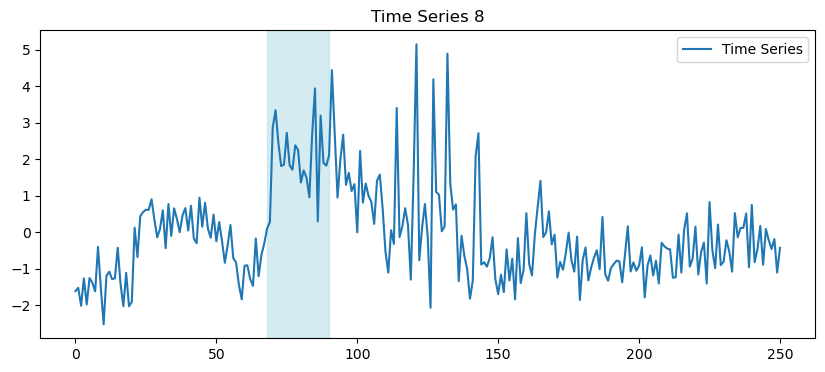

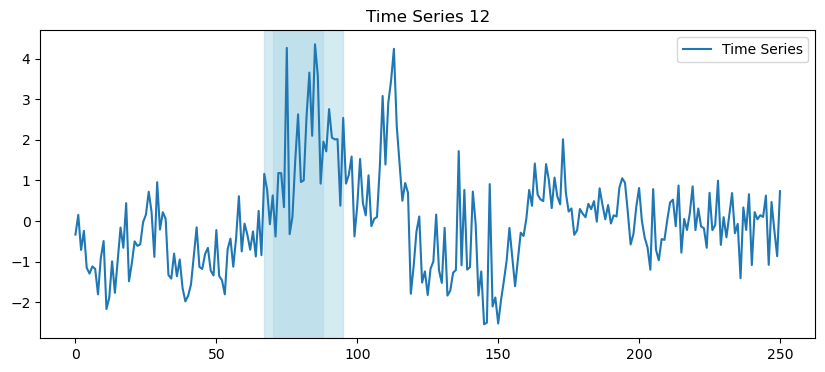

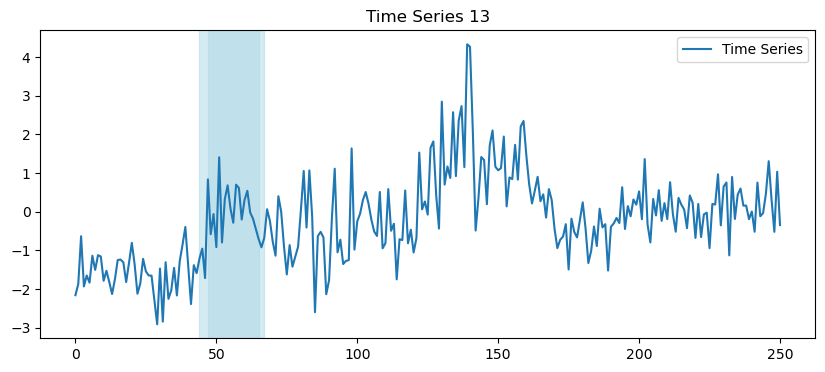

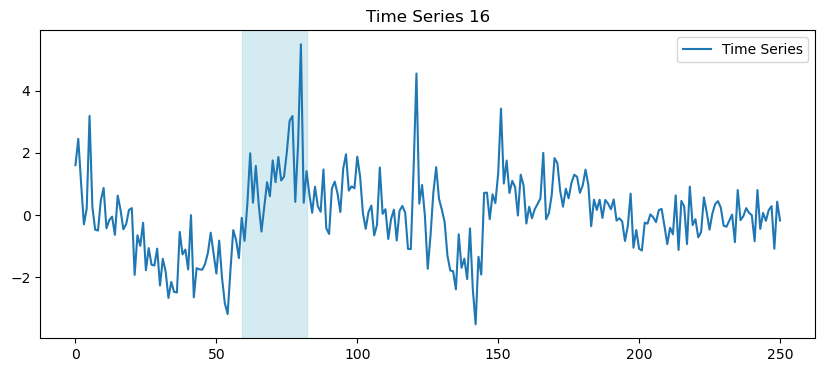

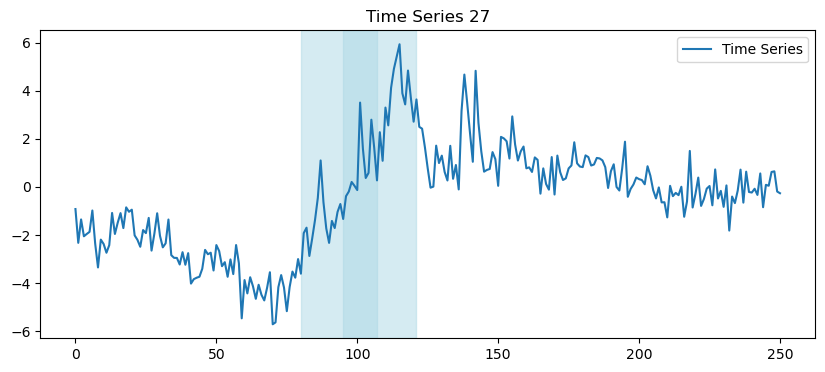

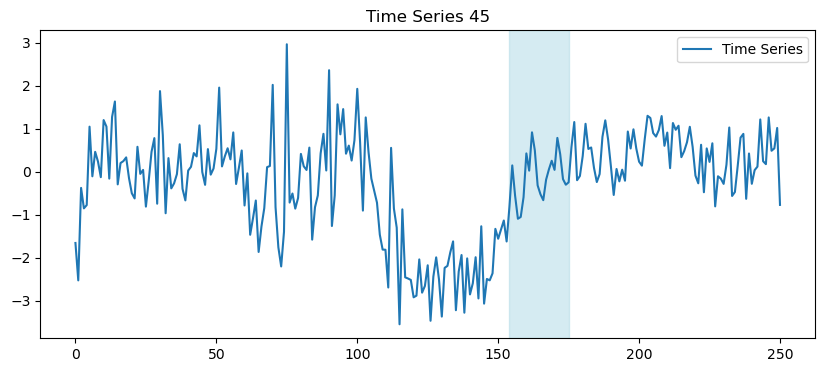

In [42]:
# Load your data
signals = np.load(files[-1])

# Get the number of time series
num_time_series = signals.shape[1]

# Define the window size
window_size = 40
# Define the duration threshold
duration_threshold = 20
# Compute entire period
period = window_size + duration_threshold

# Define the threshold factor
threshold_multiple = 3.0

# Iterate over each time series
for i in range(num_time_series):
    # Select time series
    signal = signals[:, i]

    # Calculate the annual means by averaging the values in each row
    reshaped_data = signal.reshape(-1, 12)
    annual_means = np.mean(reshaped_data, axis=1)
    
    criteria_indices = []
    
    # Iterate over the time series data
    for j in range(period, len(annual_means)):
        
        # Compute mean and std of compariosn window
        window = annual_means[j-period:j-duration_threshold]
        std_window = np.std(window)
        avg_window = np.mean(window)
        
        # compute mean of range of interest
        threshold = annual_means[j-duration_threshold:j]
        avg_threshold = np.mean(threshold)
        
        # Check if the std is above the threshold
        if avg_threshold >= avg_window + (threshold_multiple * std_window) or avg_threshold <= avg_window - (threshold_multiple * std_window):

            # save indices where threshold has been exceeding for 10 years
            criteria_indices.append(j-duration_threshold)
        
    # Check if the indices list has at least one entry
    if criteria_indices:

        ## Plot 

        time_axis = range(len(annual_means))
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(10, 4))
        
        # plot time series
        plt.plot(time_axis, annual_means, label='Time Series')
        
        # Iterate through the indices and create axvspan for consecutive values
        start = criteria_indices[0]
        for k in range(1, len(criteria_indices)):
            if criteria_indices[k] != criteria_indices[k - 1] + 1:
                end = criteria_indices[k - 1]+duration_threshold
                ax.axvspan(start, end, alpha=0.5, color='lightblue')
                
                start = criteria_indices[k]

        # Add one more axvspan for the last consecutive values
        end = criteria_indices[-1]+duration_threshold
        ax.axvspan(start, end, alpha=0.5, color='lightblue')

        plt.title(f'Time Series {i}')
        plt.legend()
        plt.show()
    

# Numpy

In [30]:
signal = np.load(files[0])[:,0]
signal.shape

(3012,)

#### Monthly data

In [37]:
# Define the window size for the 30 years (in months)
window_size = 30 * 12

# Initialize a list to store the change points
change_points = []

# Iterate over the time series data
for i in range(window_size, len(signal)):
    window = signal[i - window_size:i]
    std = np.std(window)
    
    # Check if the current value is 2 times larger than the standard deviation of the preceding 30 years
    if signal[i] >= 3.5 * std:
        change_points.append(i)


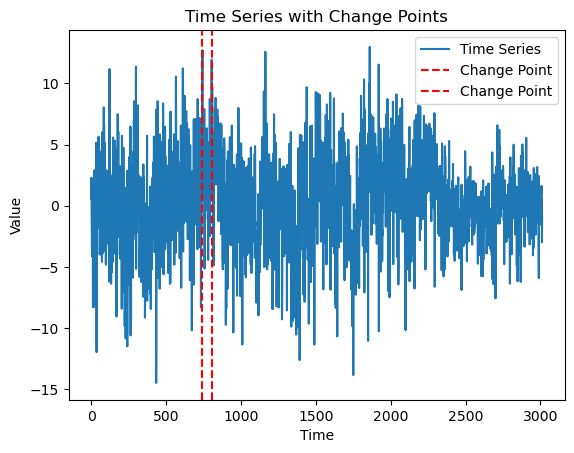

In [38]:
# Create a time axis (assuming data is monthly)
time_axis = range(len(signal))

# Plot the time series
plt.plot(time_axis, signal, label='Time Series')

# Highlight the change points
for point in change_points:
    plt.axvline(x=point, color='r', linestyle='--', label='Change Point')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Time Series with Change Points')

# Show the plot
plt.show()

#### Annual data

In [40]:
reshaped_data = signal.reshape(-1, 12)

# Calculate the annual means by averaging the values in each row
annual_means = np.mean(reshaped_data, axis=1)


In [43]:
# Define the window size for the 30 years (in months)
window_size = 30

# Initialize a list to store the change points
change_points = []

# Iterate over the time series data
for i in range(window_size, len(annual_means)):
    window = annual_means[i - window_size:i]
    std = np.std(window)
    
    # Check if the current value is 2 times larger than the standard deviation of the preceding 30 years
    if annual_means[i] >= 3.5 * std:
        change_points.append(i)

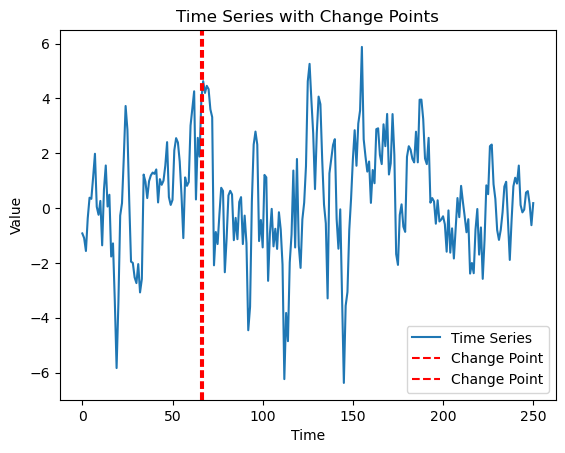

In [44]:
# Create a time axis (assuming data is monthly)
time_axis = range(len(annual_means))

# Plot the time series
plt.plot(time_axis, annual_means, label='Time Series')

# Highlight the change points
for point in change_points:
    plt.axvline(x=point, color='r', linestyle='--', label='Change Point')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Time Series with Change Points')

# Show the plot
plt.show()

## One metric

In [53]:
signals.shape

(3012, 81)

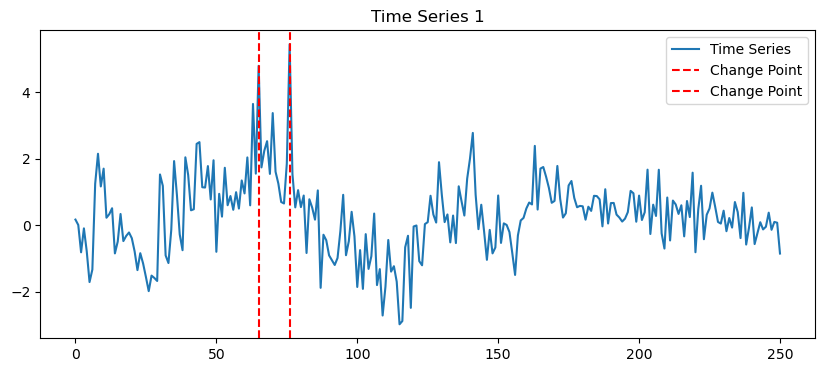

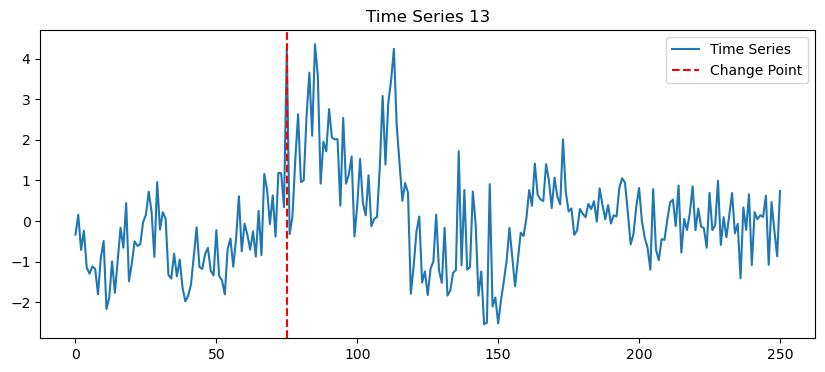

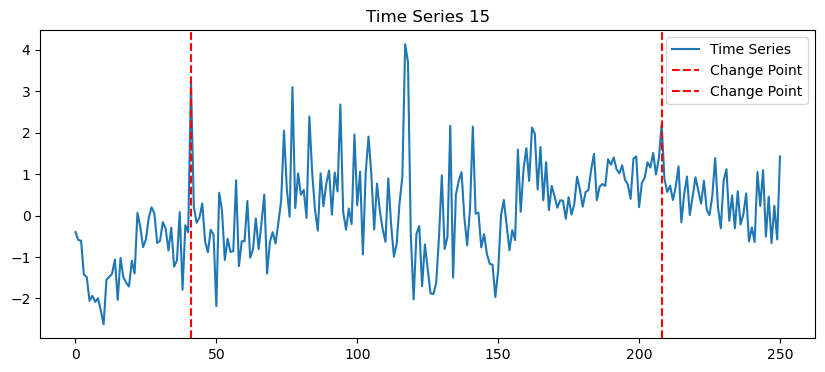

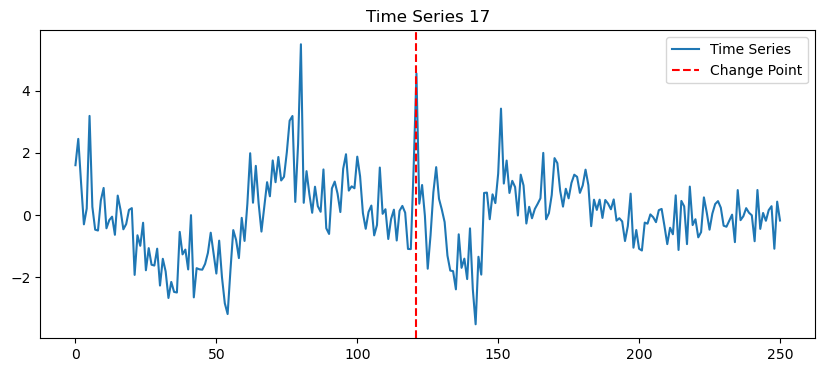

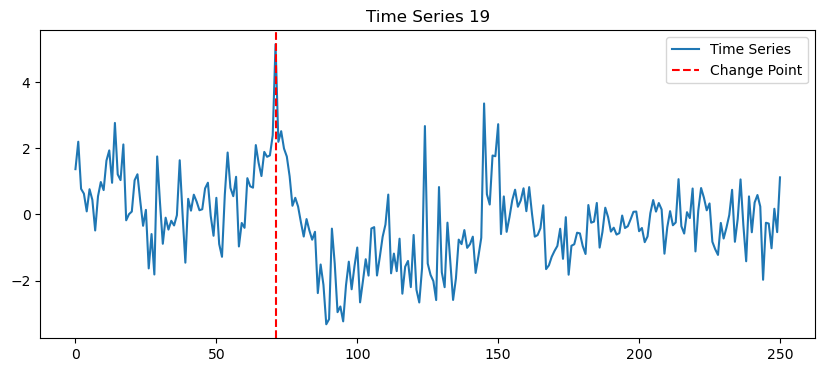

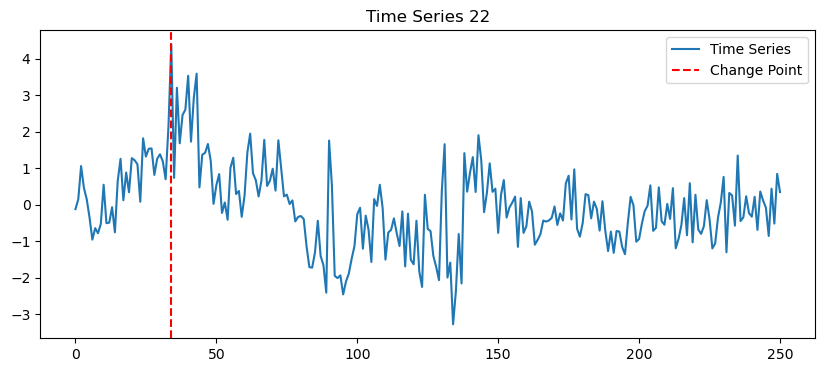

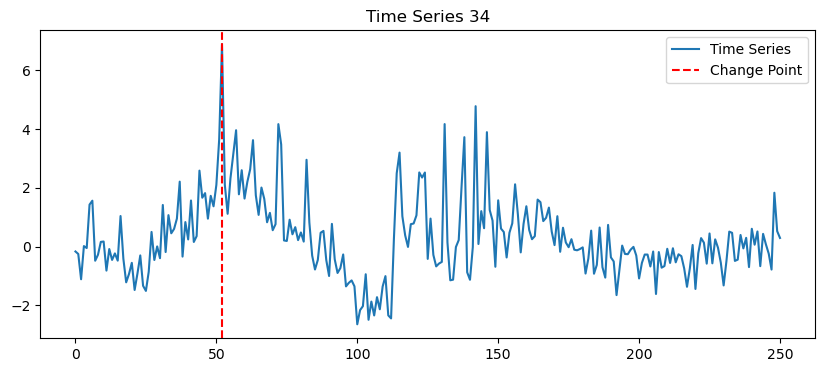

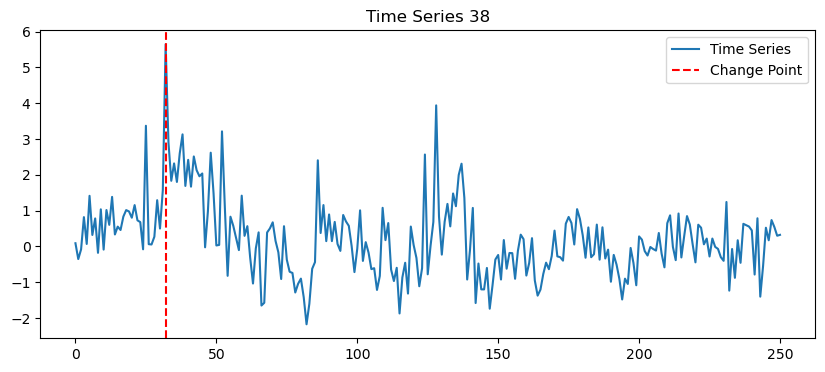

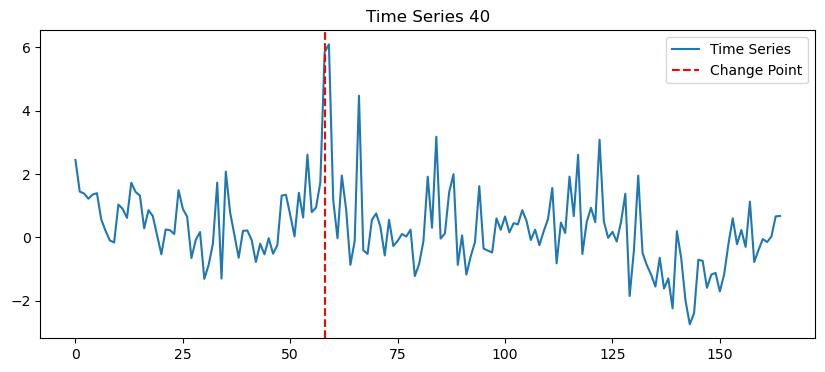

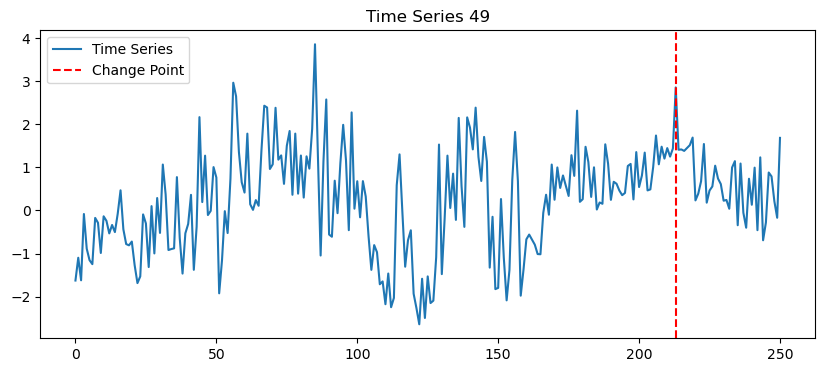

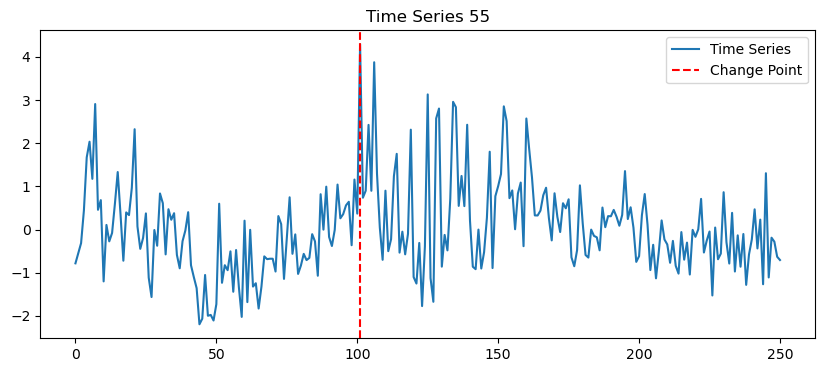

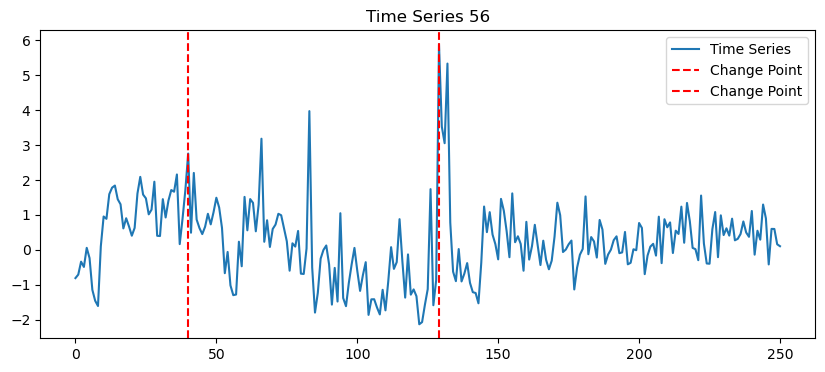

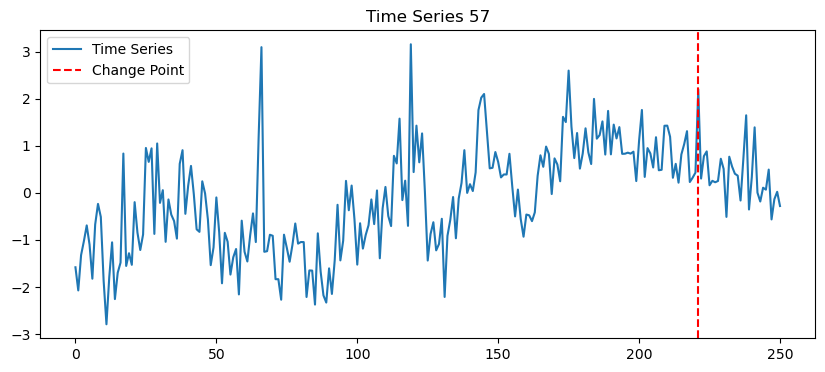

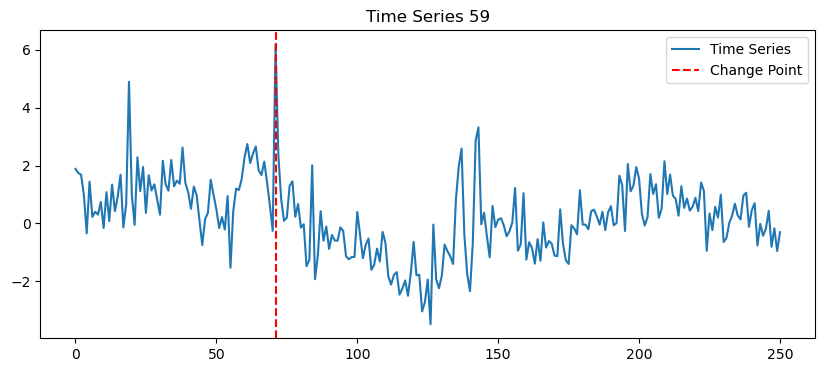

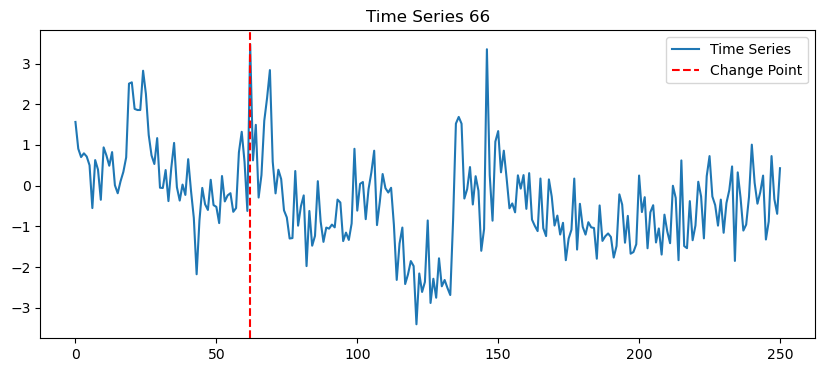

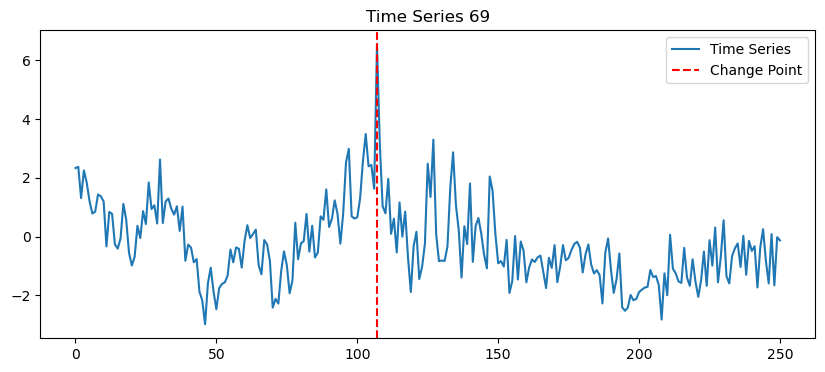

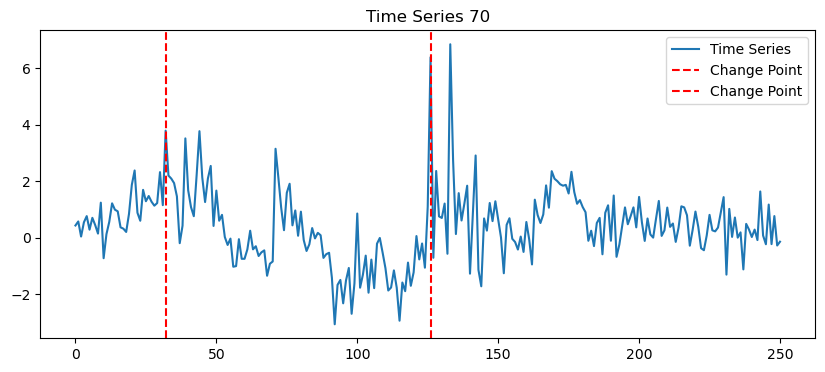

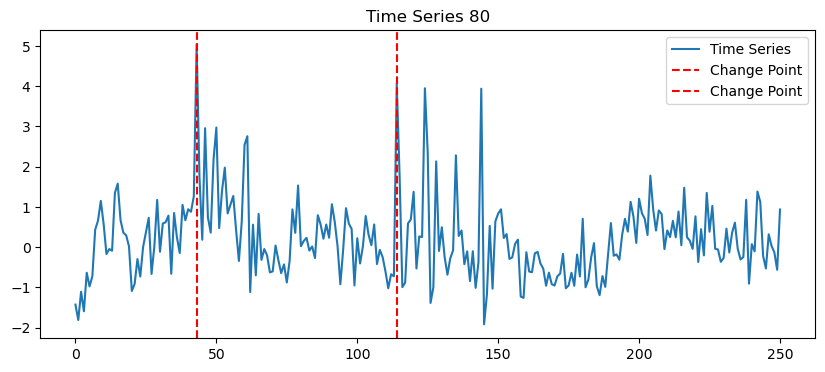

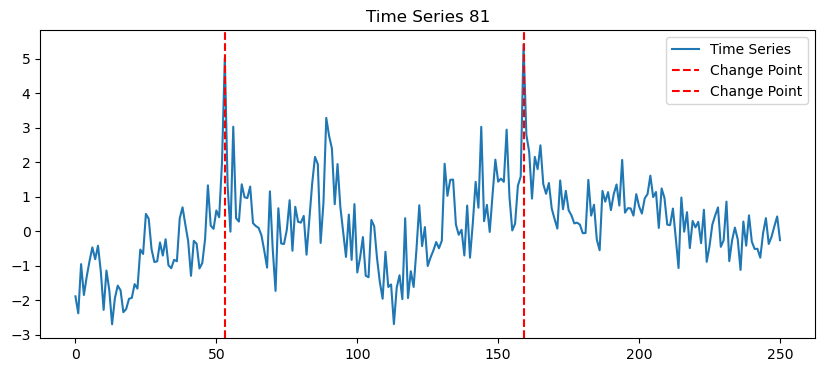

In [55]:
# Load your data
signals = np.load(files[-1])

# Get the number of time series
num_time_series = signals.shape[1]

# Define the window size for the 30 years (in months)
window_size = 30

# Iterate over each time series
for i in range(num_time_series):
    signal = signals[:, i]

    reshaped_data = signal.reshape(-1, 12)

    # Calculate the annual means by averaging the values in each row
    annual_means = np.mean(reshaped_data, axis=1)

    # Initialize a list to store the change points for this time series
    change_points = []

    # Iterate over the time series data
    for j in range(window_size, len(annual_means)):
        window = annual_means[j - window_size:j]
        std = np.std(window)

        # Check if the current value is 2 times larger than the standard deviation of the preceding 30 years
        if annual_means[j] >= 5 * std:
            change_points.append(j)

    # Check if there are change points for this time series
    if change_points:
        # Create a time axis (assuming data is monthly)
        time_axis = range(len(annual_means))

        plt.figure(figsize=(10, 4))
        plt.plot(time_axis, annual_means, label='Time Series')
        
        # Highlight the change points for this time series
        for point in change_points:
            plt.axvline(x=point, color='r', linestyle='--', label='Change Point')
        
        plt.title(f'Time Series {i + 1}')
        #plt.legend()
        plt.show()

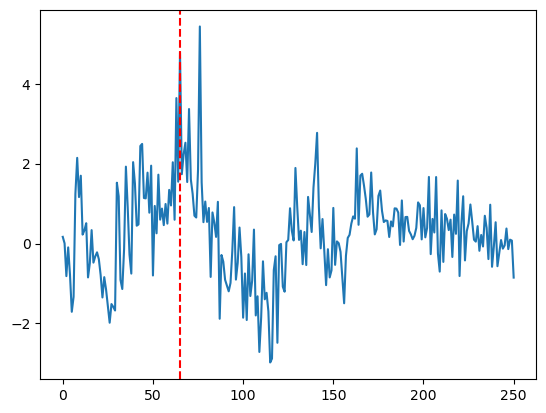

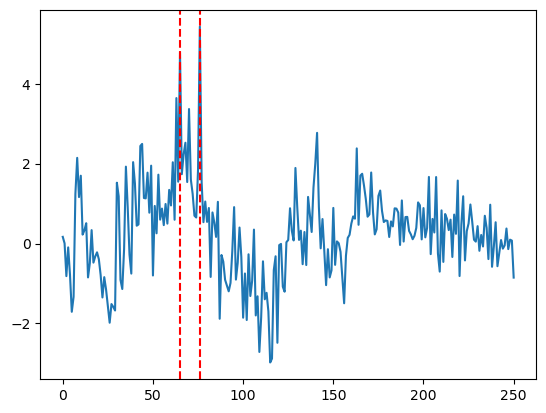

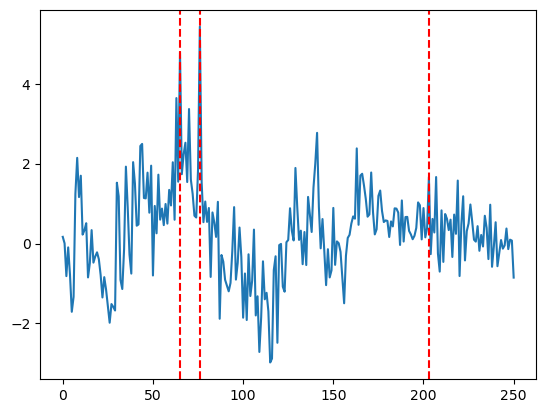

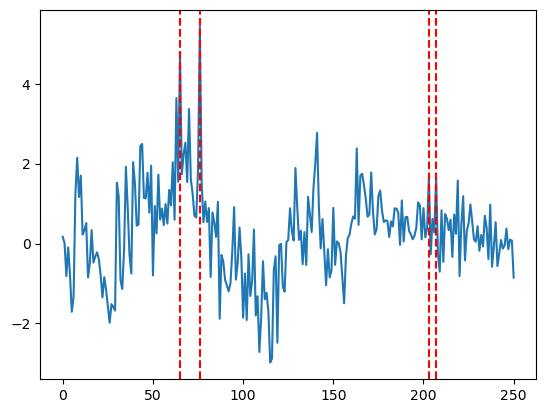

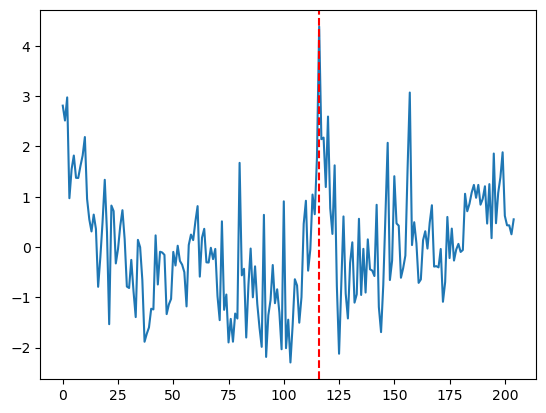

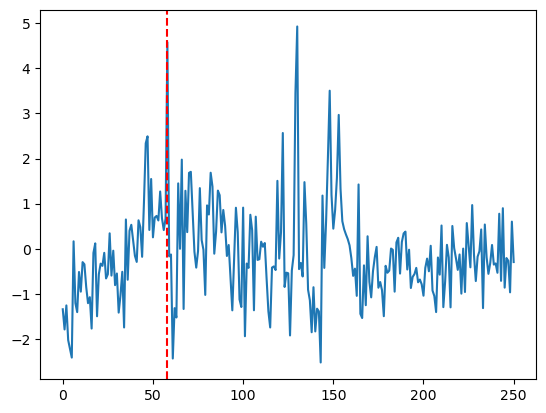

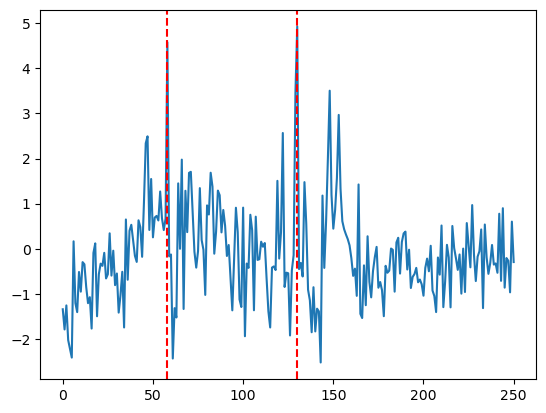

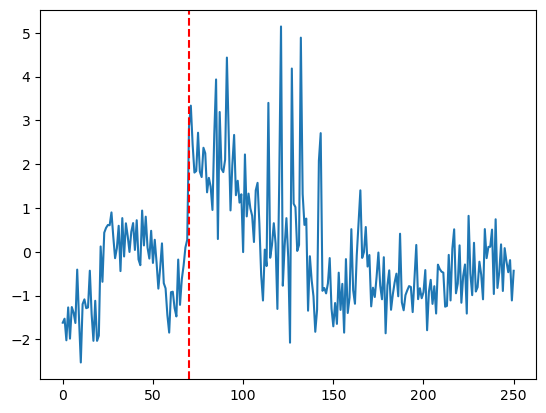

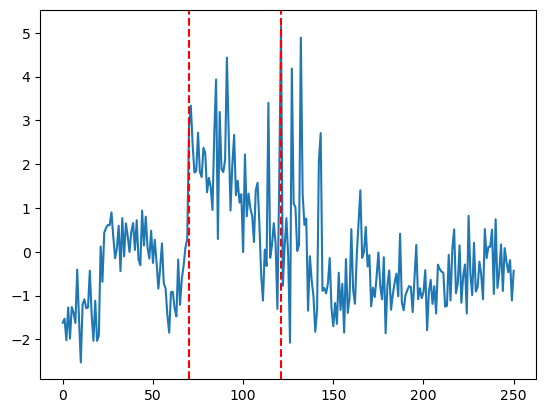

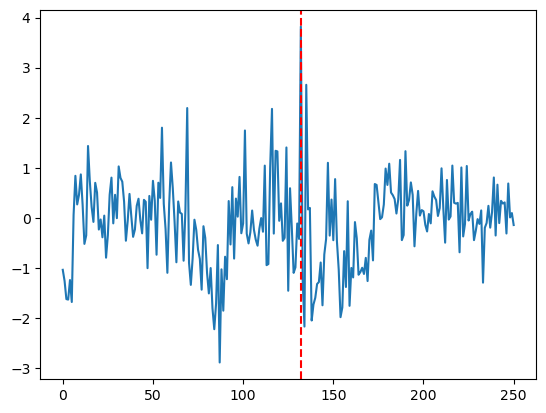

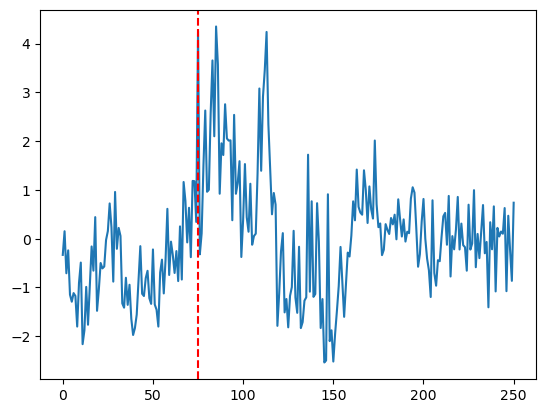

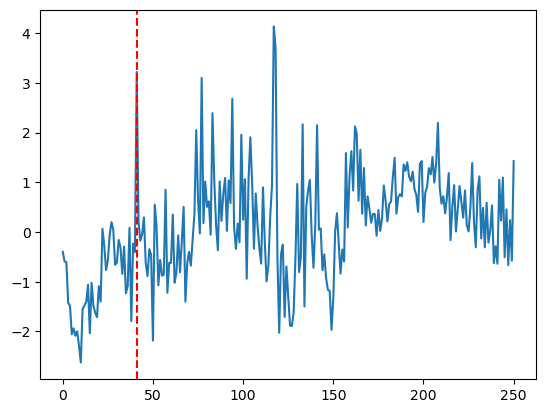

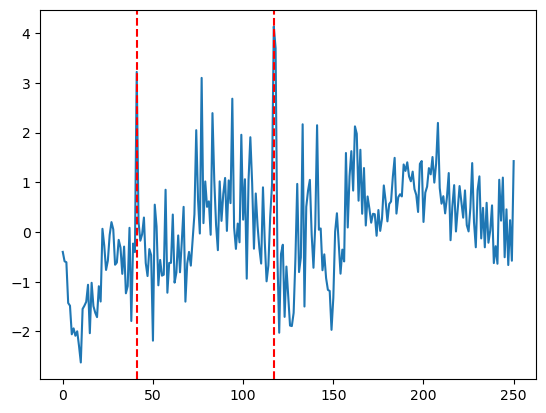

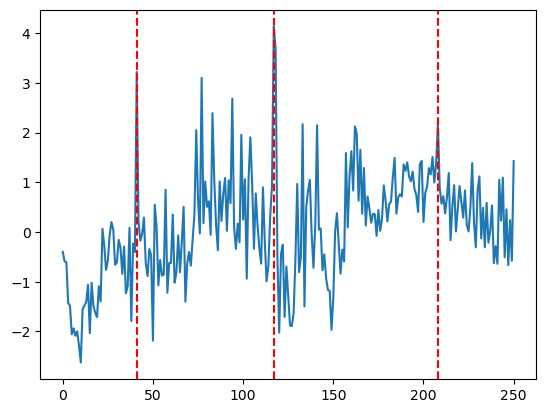

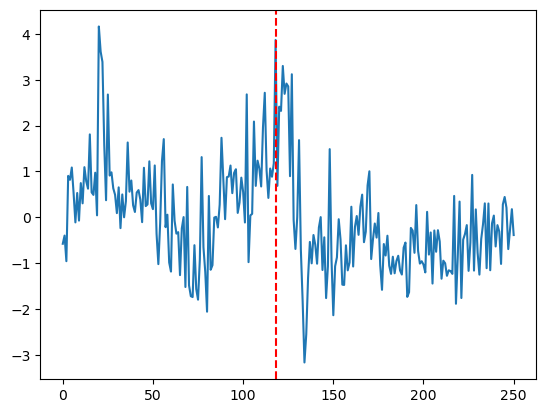

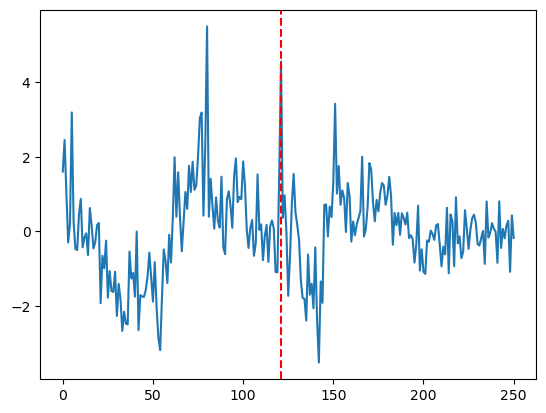

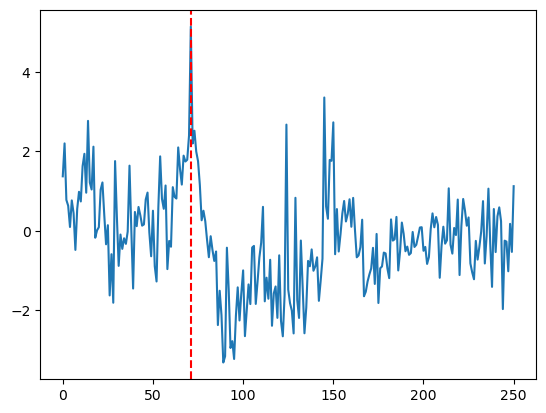

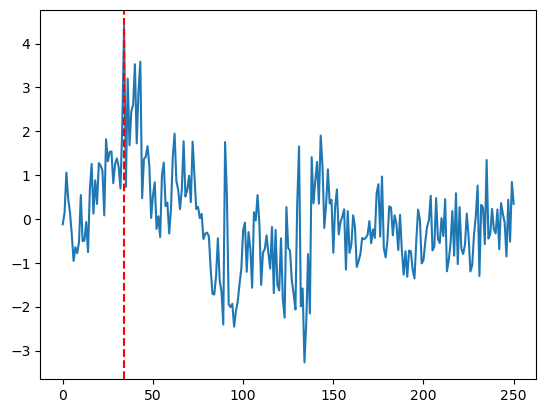

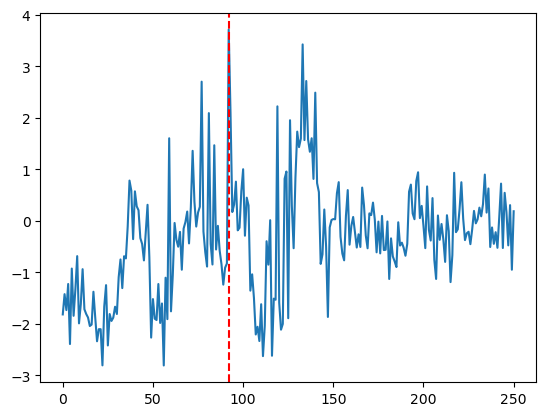

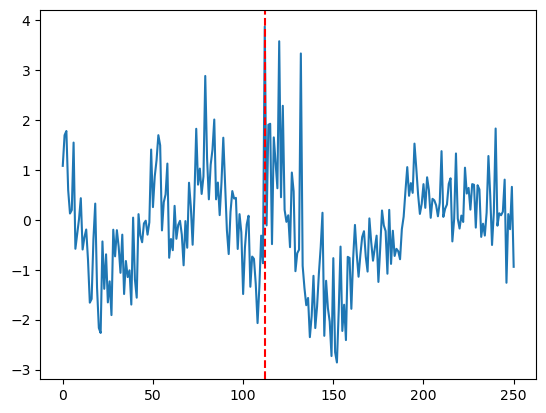

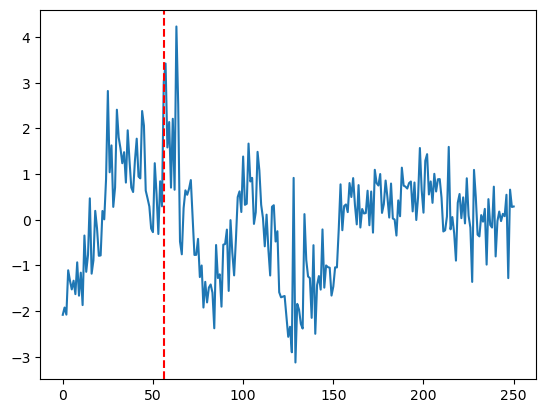

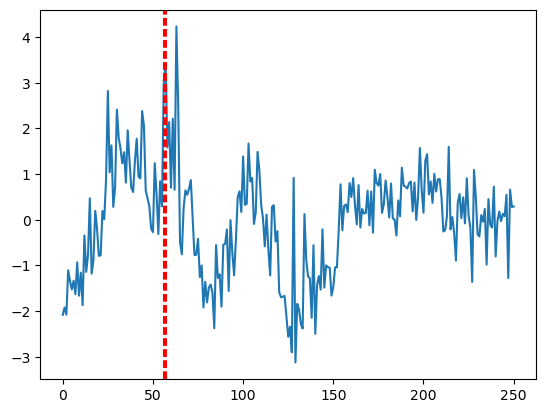

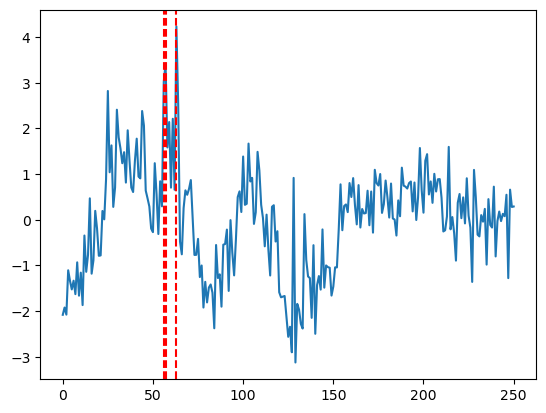

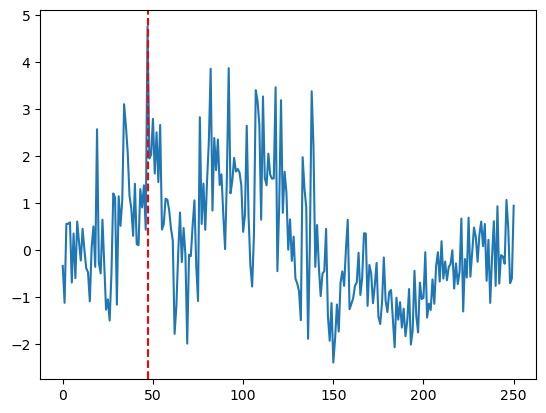

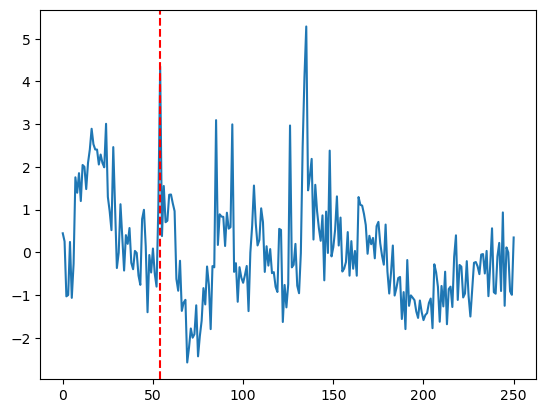

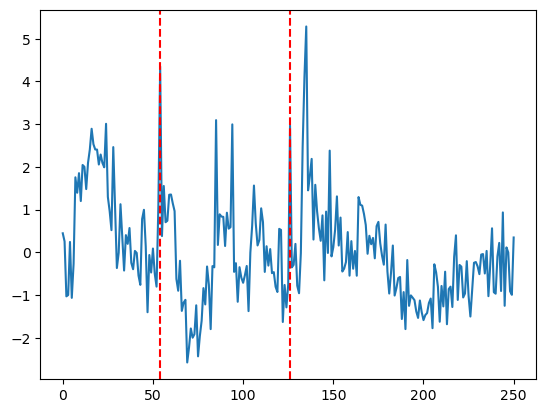

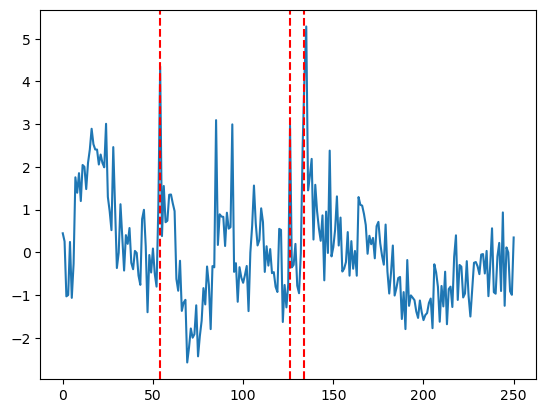

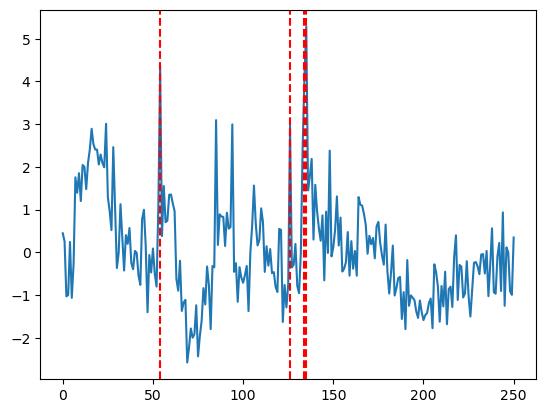

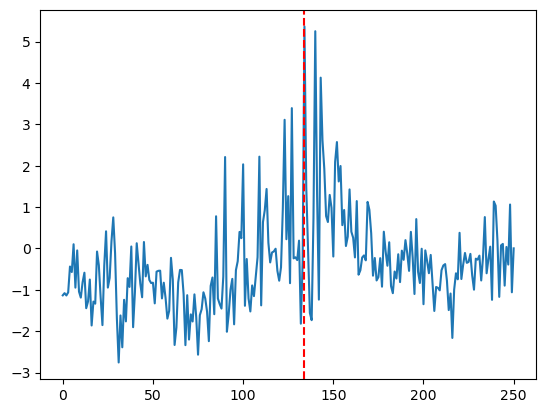

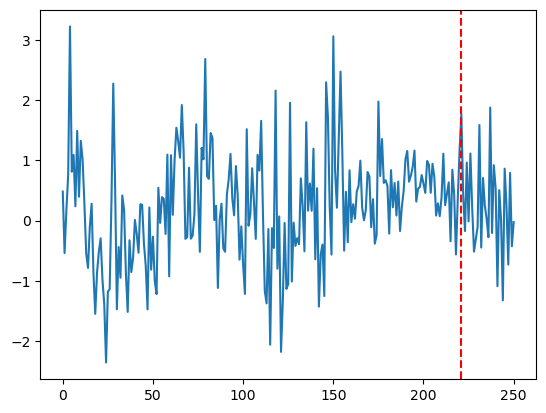

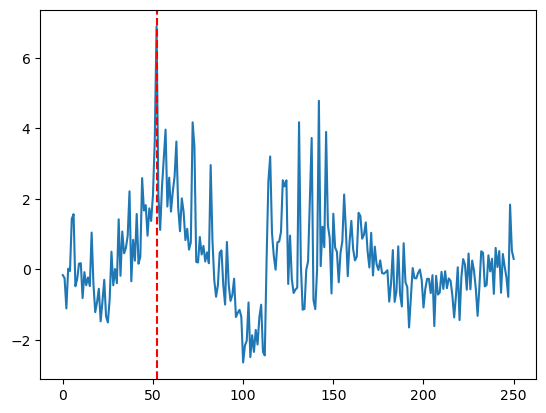

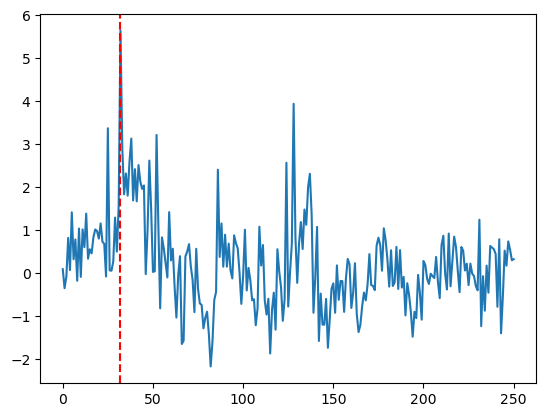

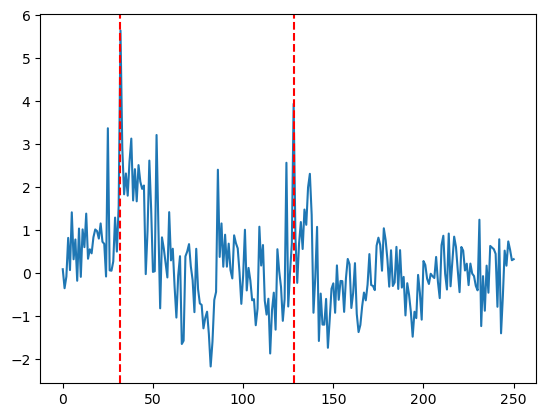

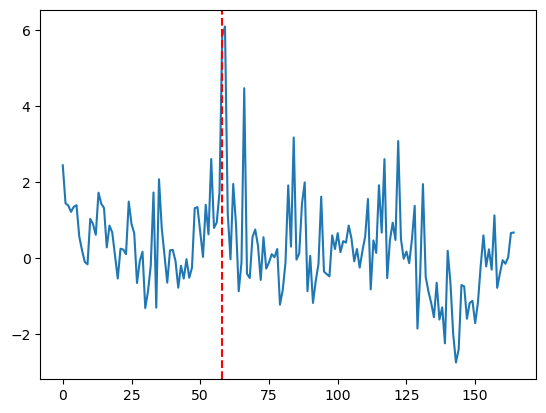

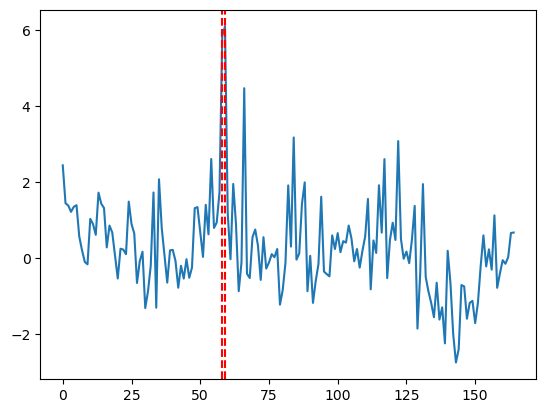

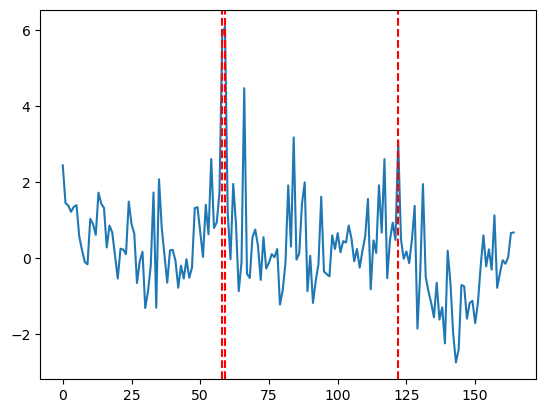

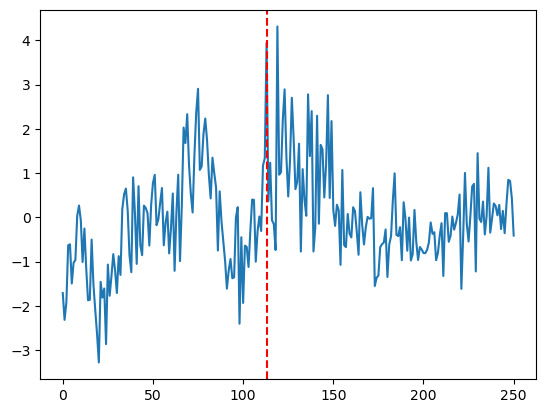

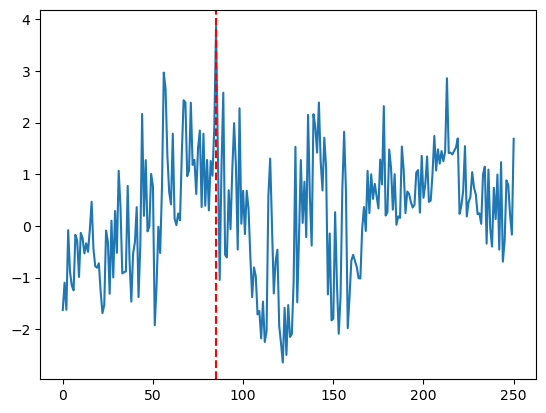

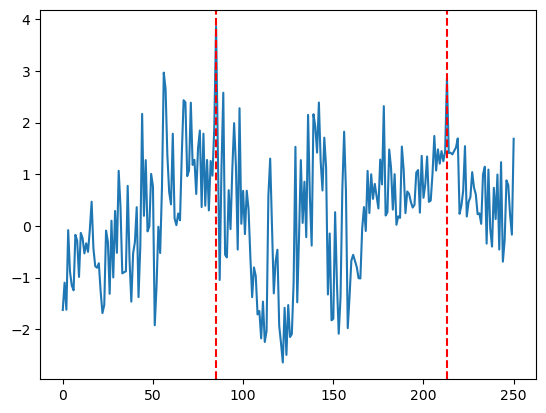

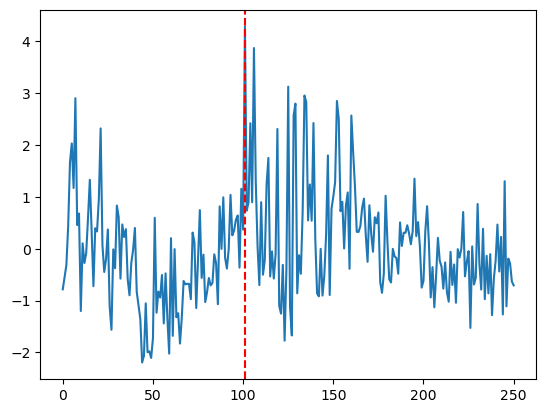

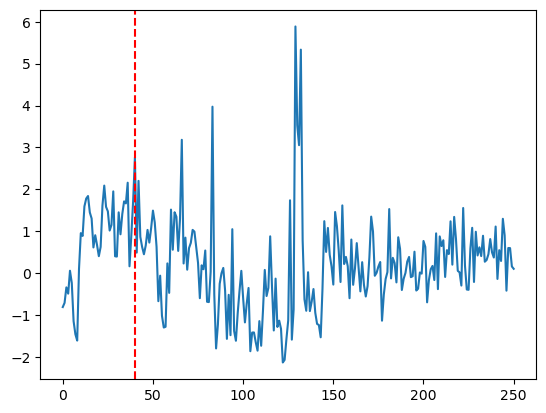

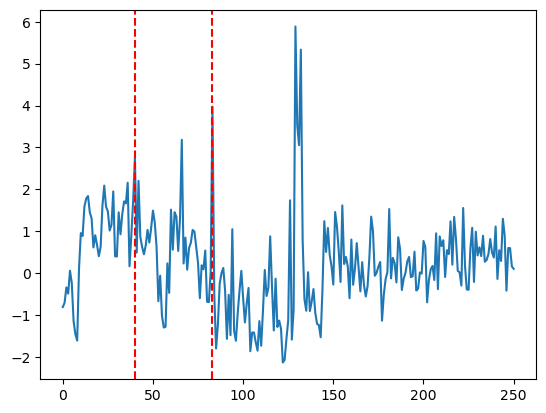

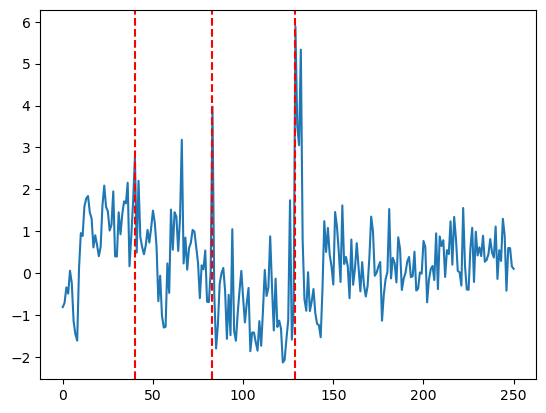

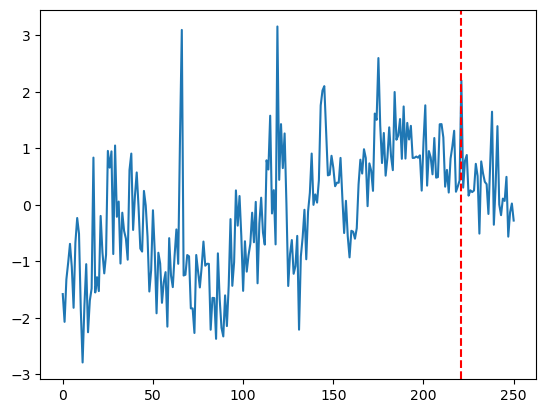

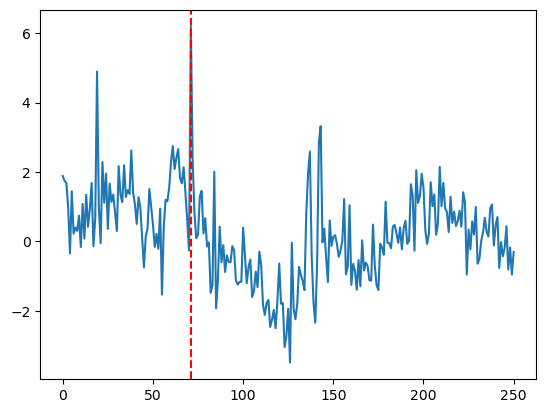

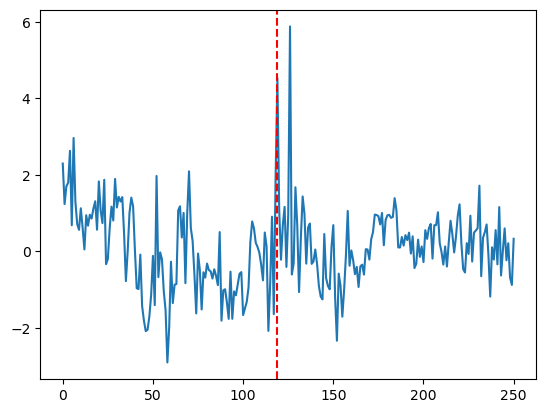

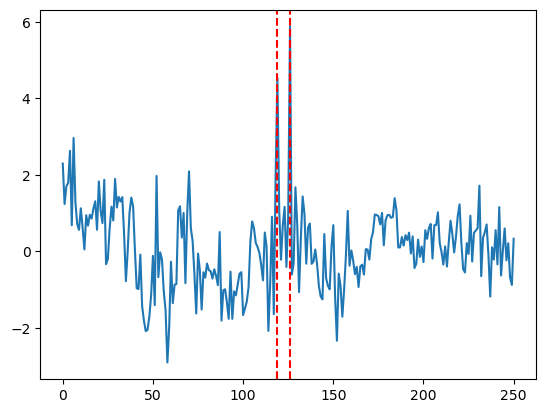

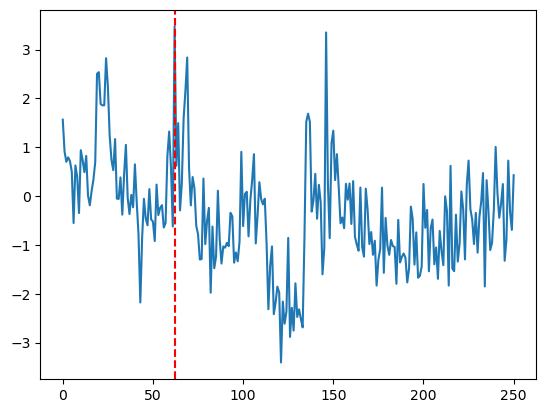

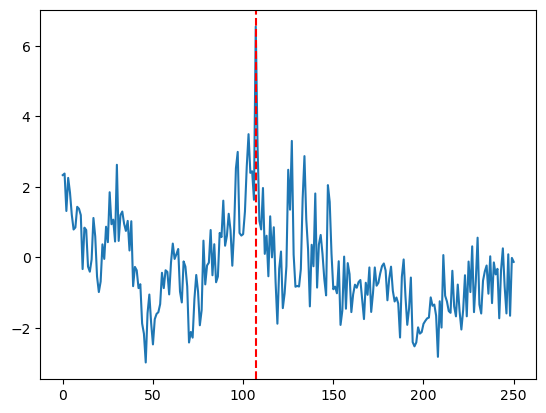

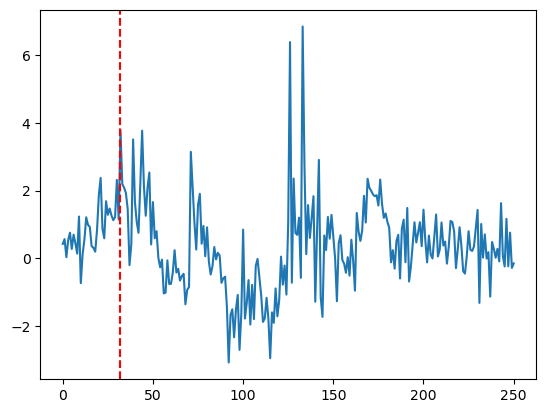

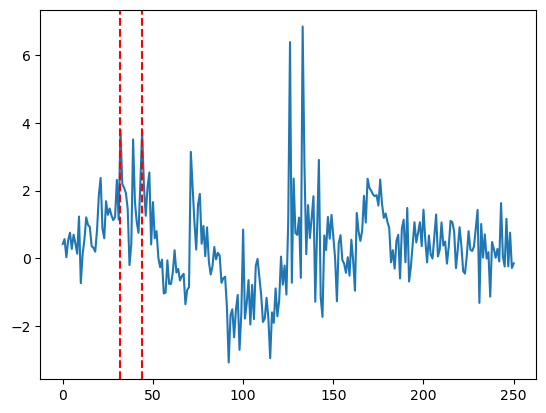

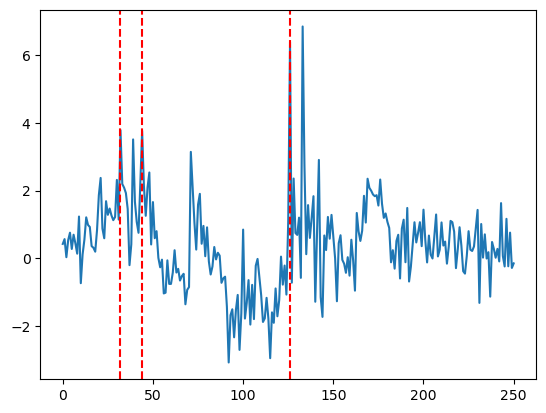

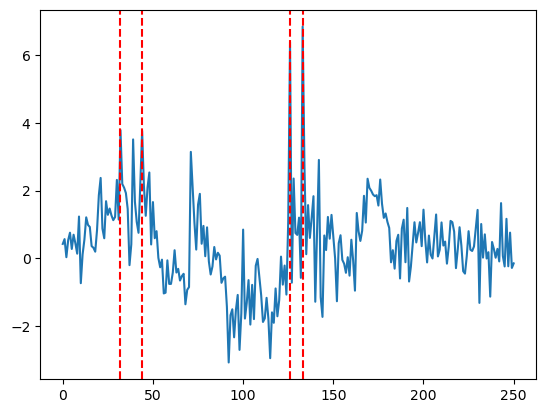

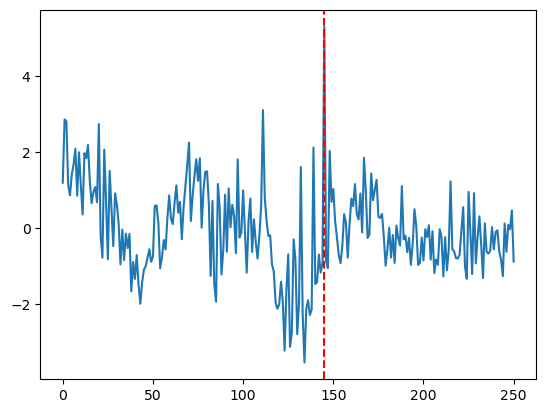

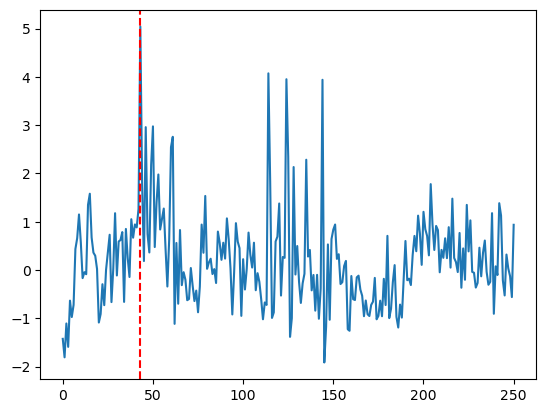

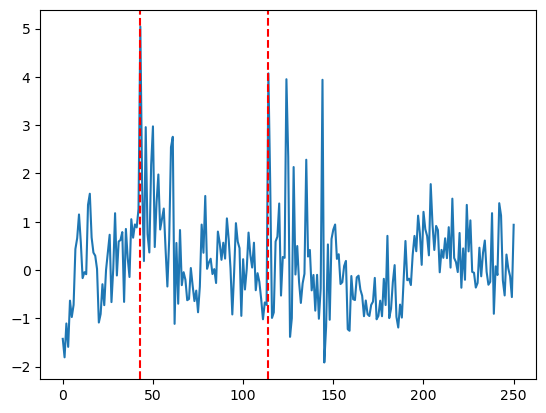

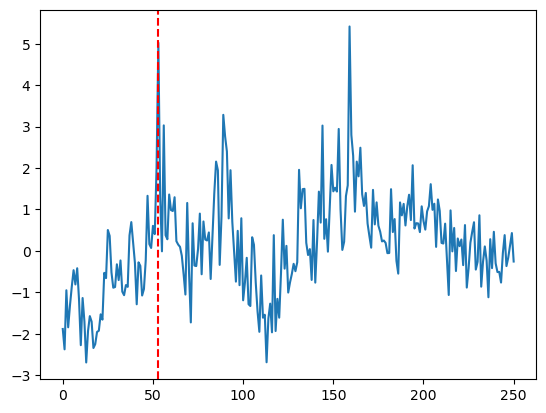

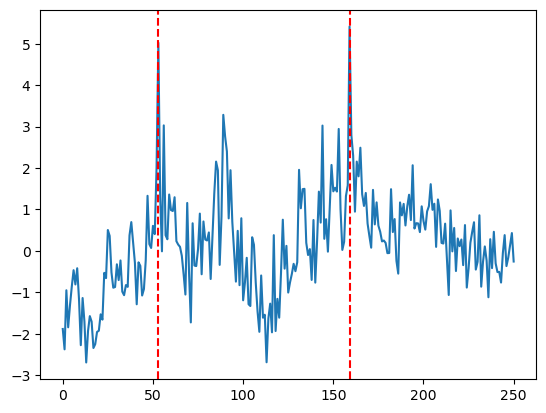

In [51]:
signals = np.load(files[-1])

for i in range(len(signals[0,:])):

    signal = signals[:,i]
    
    reshaped_data = signal.reshape(-1, 12)

    # Calculate the annual means by averaging the values in each row
    annual_means = np.mean(reshaped_data, axis=1)

    # Define the window size for the 30 years (in months)
    window_size = 30

    # Initialize a list to store the change points
    change_points = []

    # Iterate over the time series data
    for i in range(window_size, len(annual_means)):
        window = annual_means[i - window_size:i]
        std = np.std(window)

        # Check if the current value is 2 times larger than the standard deviation of the preceding 30 years
        if annual_means[i] >= 4 * std:
            change_points.append(i)
            
            # Create a time axis (assuming data is monthly)
            time_axis = range(len(annual_means))

            # Plot the time series
            plt.plot(time_axis, annual_means, label='Time Series')
            # Highlight the change points
            for point in change_points:
                plt.axvline(x=point, color='r', linestyle='--', label='Change Point')
            # Show the plot
            plt.show()

# Ruptures

## Single time series

In [11]:
signal = np.load(files[0])[:,0]
signal.shape

Window-based change point detection
change points for penalty = 5:  [870, 1780, 3012]


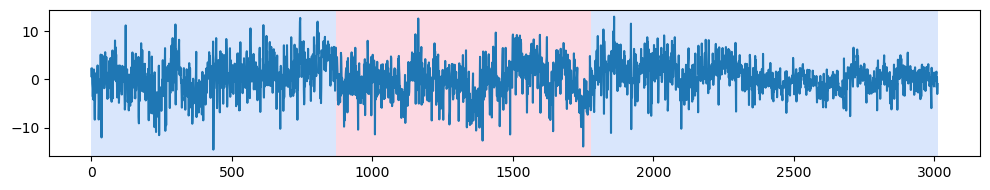

In [17]:
pen=5

algo_window = rpt.Window(model="rbf").fit(signal) 
result = algo_window.fit_predict(signal, pen=pen) # why penalty 10?

print('Window-based change point detection')
print('change points for penalty = ' +str(pen) + ': ', result)
rpt.display(signal, result)
plt.show()

In [25]:
result

[945, 1835, 3012]

## One metric

Window-based change point detection, file:  2
change points for penalty = 40:  [1925, 3012]


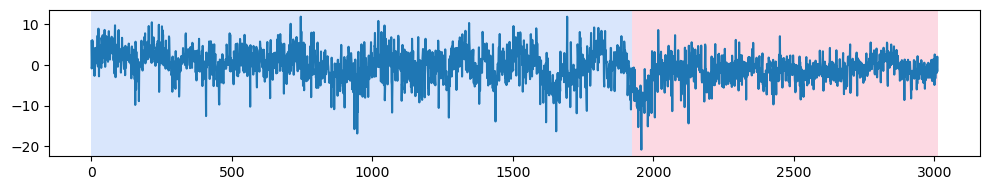

Window-based change point detection, file:  7
change points for penalty = 40:  [2600, 3012]


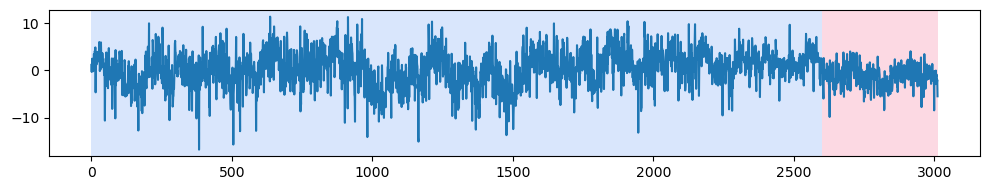

Window-based change point detection, file:  12
change points for penalty = 40:  [1170, 3012]


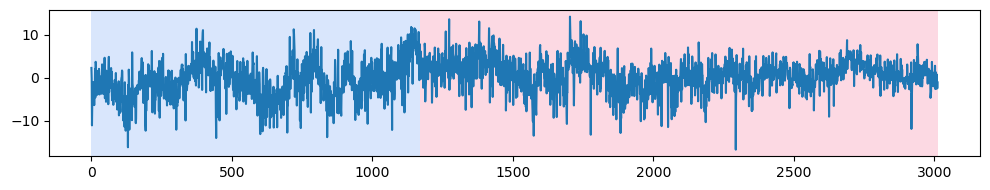

Window-based change point detection, file:  28
change points for penalty = 40:  [2000, 3012]


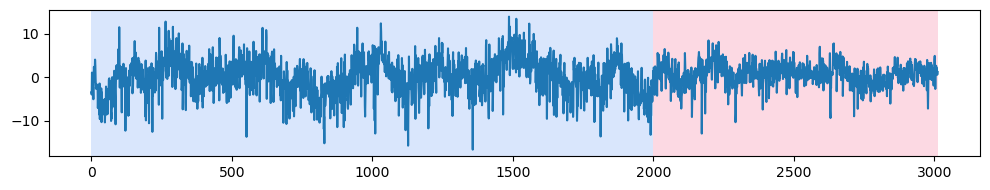

Window-based change point detection, file:  69
change points for penalty = 40:  [1615, 3012]


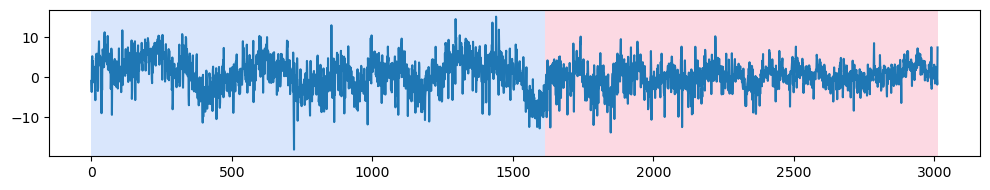

Window-based change point detection, file:  74
change points for penalty = 40:  [1830, 3012]


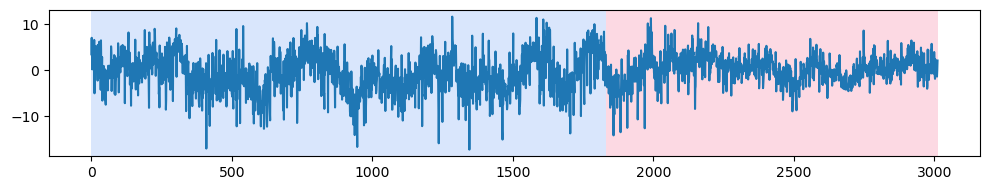

Window-based change point detection, file:  76
change points for penalty = 40:  [2120, 3012]


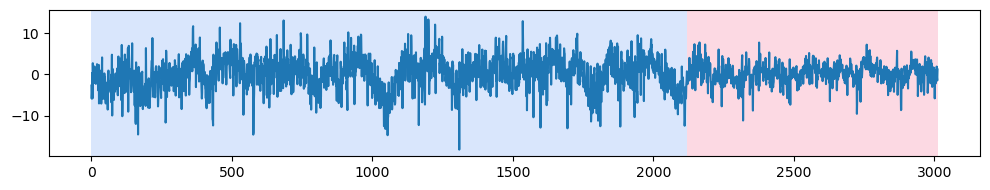

Window-based change point detection, file:  78
change points for penalty = 40:  [1860, 3012]


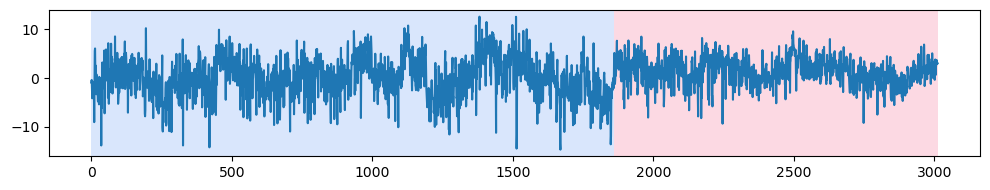

Window-based change point detection, file:  79
change points for penalty = 40:  [1840, 3012]


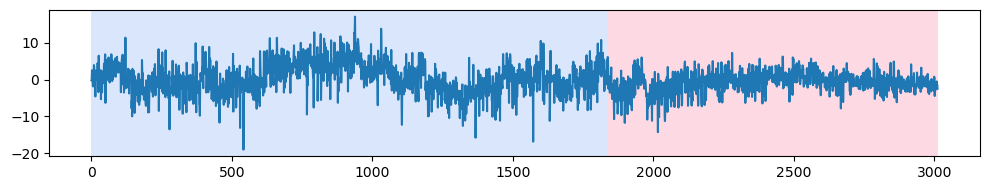

Window-based change point detection, file:  80
change points for penalty = 40:  [310, 3012]


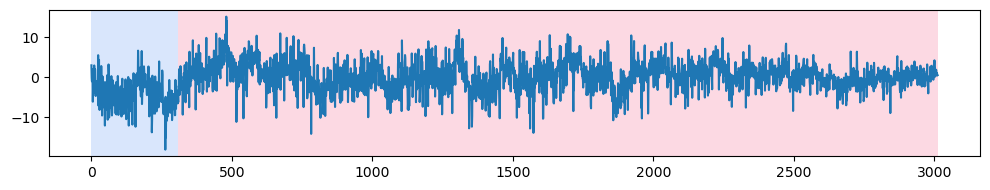

Window-based change point detection, file:  81
change points for penalty = 40:  [945, 1835, 3012]


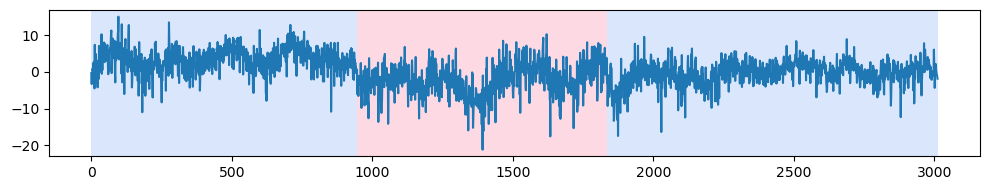

In [29]:
pen=40

signals = np.load(files[0])

for i in range(len(signals[0,:])):

    signal = signals[:,i]

    algo_window = rpt.Window(model="rbf").fit(signal) 
    result = algo_window.fit_predict(signal, pen=pen) # why penalty 10?
    
    if len(result) > 1:
        print('Window-based change point detection, file: ', str(i))
        print('change points for penalty = ' +str(pen) + ': ', result)
        rpt.display(signal, result)
        plt.show()

## Code from summer semster 2023

In [ ]:
# length of time series
len_time = 3012

arrays_dict = {} # Create a dictionary to store the arrays

print('initialisation complete')

### COMPUTATION ###

# loop through list of files
for i in range(len(files)):
    
    signal = np.load(files[i])
        
    # compute change points
    algo_window = rpt.Window(model="rbf").fit(signal) 
    result = algo_window.fit_predict(signal, pen=40)

    # Add the arra to the dictionary with a unique key
    key = f"array_{i}"
    arrays_dict[key] = result
    
    print('file ', str(i), '/', str(len(files)), ' executed')
    
print('execution finished')
    
### OUTPUT ###
# Save all change point arrays containing to a single file
np.savez(files[i][11:-15]+"_change_points.npz", **arrays_dict)
    
print('saving successful')